In [1]:
from fastai.vision.all import *
from fastai.vision.utils import *

In [2]:
path = './imgs'

In [3]:
shoes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


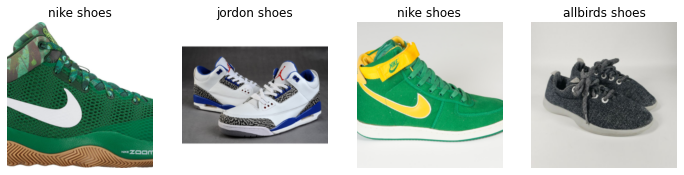

In [4]:
dls = shoes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [5]:
shoes = shoes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = shoes.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\dhruv\anaconda3\lib\site-packages\torch\_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


In [6]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

C:\Users\dhruv\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


C:\Users\dhruv\anaconda3\lib\site-packages\fastai\callback\schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


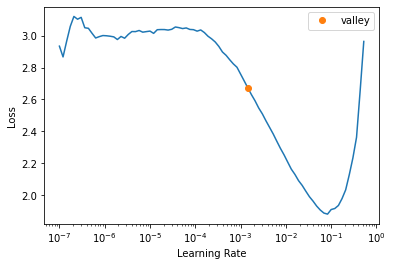

In [7]:
lr = learn.lr_find()

In [9]:
lr.valley

0.0014454397605732083

In [11]:
learn.fine_tune(4, base_lr=lr.valley, cbs=SaveModelCallback())

epoch,train_loss,valid_loss,error_rate,time
0,1.850987,0.703792,0.225000,01:10


Better model found at epoch 0 with valid_loss value: 0.7037917971611023.


epoch,train_loss,valid_loss,error_rate,time
0,0.774598,0.397479,0.102083,01:11
1,0.579518,0.263781,0.066667,01:11
2,0.400640,0.199929,0.047917,01:12
3,0.311417,0.187126,0.041667,01:12


Better model found at epoch 0 with valid_loss value: 0.39747920632362366.
Better model found at epoch 1 with valid_loss value: 0.2637813687324524.
Better model found at epoch 2 with valid_loss value: 0.19992877542972565.
Better model found at epoch 3 with valid_loss value: 0.18712569773197174.


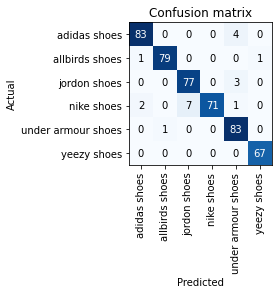

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

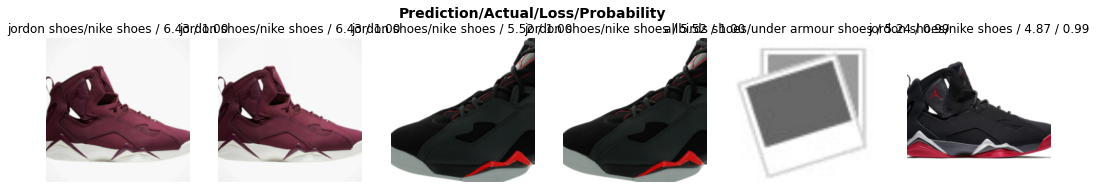

In [13]:
interp.plot_top_losses(6, nrows=1)

In [14]:
learn.export('shoe_classifier.pkl')